# Merging Data to Understand the Relationship between Drug Legalization and Violent Crime

<span style="color: #008080">*Jiechen Li*</span>



In recent years, many US states have decided to legalize the use of marijuana. 

When these ideas were first proposed, there were many theories about the relationship between crime and the "War on Drugs" (the term given to US efforts to arrest drug users and dealers over the past several decades). 

In this exercise, we're going to test a few of those theories using drug arrest data from the state of California. 

Though California has passed a number of laws lessening penalities for marijuana possession over the years, arguably the biggest changes were in  2010, when the state changed the penalty for possessing a small amount of marijuana from a criminal crime to a "civil" penality (meaning those found guilty only had to pay a fine, not go to jail), though possessing, selling, or producing larger quantities remained illegal. Then in 2016, the state fully legalized marijuana for recreational use, not only making possession of small amounts legal, but also creating a regulatory system for producing marijuana for sale. 

Proponents of drug legalization have long argued that the war on drugs contributes to violent crime by creating an opportunity for drug dealers and organized crime to sell and distribute drugs, a business which tends to generate violence when gangs battle over territory. According to this theory, with drug legalization, we should see violent crime decrease after legalization in places where drug arrests had previously been common. 

**To be clear,** this is far from the only argument for drug legalization! It is simply the argument we are well positioned to analyze today. 


## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_merging.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex6_validate_keyword",
    "ex10_merged_successfully",
    "ex16_num_obs",
    "ex17_drug_change",
    "ex18_violent_change",
    "ex21_diffindiff",
    "ex23_diffindiff_proportionate",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.

## Pre-Legalization Analysis

### Exercise 1
We will begin by examining [county-level data on arrests from California in 2009](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca). This data is derived directly from data hosted by the [Office of the California State Attorney General](https://openjustice.doj.ca.gov/data), but please follow the github link above and download and import the file `ca_arrests_2009.csv` (don't try and get it directly from the State Attorney General's office). 

In [64]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

data_1 = "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/ca_arrests_2009.csv"

arrests = pd.read_csv(data_1)


print("Loading the county-level data on arrests from California in 2009 from URL:")
arrests.head()

Loading the county-level data on arrests from California in 2009 from URL:


,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431
1,1683,Alpine County,8,4,2,1,1,16,83,0
2,1684,Amador County,100,59,101,5,199,464,801,2
3,1685,Butte County,641,602,542,34,429,2248,9026,1
4,1686,Calaveras County,211,83,123,14,70,501,968,3


### Exercise 2
Use your data exploration skills to get a feel for this data. If you need to, you can find the [original codebook here](https://github.com/nickeubank/practicaldatascience/blob/master/Example_Data/ca/arrests_codebook.pdf) (This data is a version of that data, but collapsed to one observation per county.)

Ten Counties Violent Arrests in CA.


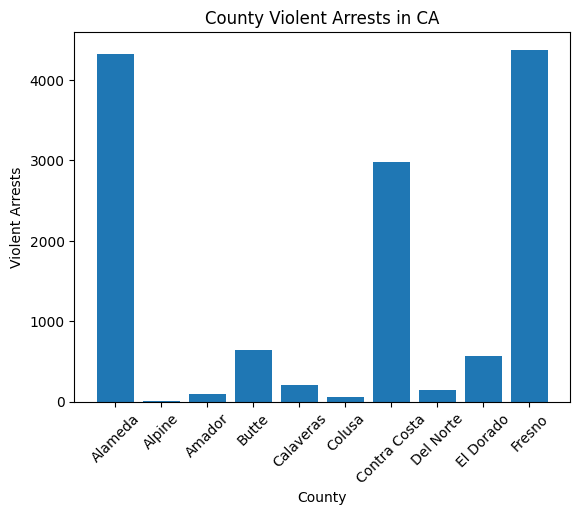

In [65]:
arrests.sample(10)

import matplotlib.pyplot as plt

categories = [
    "Alameda",
    "Alpine",
    "Amador",
    "Butte",
    "Calaveras",
    "Colusa",
    "Contra Costa",
    "Del Norte",
    "El Dorado",
    "Fresno",
]
values = [4318, 8, 100, 641, 211, 58, 2976, 144, 570, 4377]

plt.bar(categories, values, width=0.8)

plt.title("County Violent Arrests in CA")
plt.xlabel("County")
plt.ylabel("Violent Arrests")

plt.xticks(rotation=45)

print("Ten Counties Violent Arrests in CA.")
plt.show()

### Exercise 3
Figuring out what county has the most violent arrests isn't very meaningful if we don't normalize for size. A county with 10 people and 10 arrests for violent crimes is obviously worse than a county with 1,000,000 people an 11 arrests for violent crime. 

To address this, also import `nhgis_county_populations.csv` from [the directory we're working from](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca).

In [66]:
data_2 = "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/nhgis_county_populations.csv"
pop = pd.read_csv(data_2)
pop

print(
    "20 county-level sample data on arrests for California in 2005-2009 from another dataset URL:"
)
pop.sample(20)

20 county-level sample data on arrests for California in 2005-2009 from another dataset URL:


,Unnamed: 0,YEAR,STATE,COUNTY,total_population
1407,1407,2005-2009,Mississippi,Calhoun County,14533
1844,1844,2005-2009,New York,Franklin County,50374
5926,2705,2013-2017,Texas,Panola County,23574
1208,1208,2005-2009,Maryland,Prince George's County,834986
4634,1413,2013-2017,Mississippi,Clay County,19990
957,957,2005-2009,Kansas,Osage County,16386
4151,930,2013-2017,Kansas,Jackson County,13322
1594,1594,2005-2009,Missouri,Webster County,35635
4486,1265,2013-2017,Michigan,Iosco County,25317
3056,3056,2005-2009,Wisconsin,Chippewa County,59872


### Exercise 4
Use your data exploration skills to get used to this data, and figure out how it relates to your 2009 arrest data. 

In [67]:
# filter for California

# cali_state = df2[df2["STATE"] == "California"]
# cali_2009 = cali_state[cali_state["YEAR"] == "2005-2009"]
# cali_2009
pop = pop[(pop["STATE"] == "California") & (pop["YEAR"] == "2005-2009")]
pop.tail()

,Unnamed: 0,YEAR,STATE,COUNTY,total_population
239,239,2005-2009,California,Tulare County,416299
240,240,2005-2009,California,Tuolumne County,55761
241,241,2005-2009,California,Ventura County,792313
242,242,2005-2009,California,Yolo County,192974
243,243,2005-2009,California,Yuba County,70906


### Exercise 5

Once you feel like you have a good sense of the relation between our arrest and population data, merge the two datasets.

In [68]:
# merge arrests & pop
merged_df = pd.merge(arrests, pop, on="COUNTY", how="outer", indicator=True)
merged_df.value_counts("_merge")

merged_df.sample(5)

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
24,1706.0,Modoc County,47.0,29.0,10.0,5.0,52.0,143.0,310.0,50.0,210.0,2005-2009,California,9162.0,both
2,1684.0,Amador County,100.0,59.0,101.0,5.0,199.0,464.0,801.0,2.0,188.0,2005-2009,California,38039.0,both
53,1735.0,Tulare County,2183.0,2080.0,1681.0,170.0,1767.0,7881.0,15368.0,301.0,239.0,2005-2009,California,416299.0,both
15,1697.0,Kings County,390.0,322.0,278.0,49.0,499.0,1538.0,5203.0,415.0,201.0,2005-2009,California,146696.0,both
18,1700.0,Los Angeles County,35319.0,34630.0,32193.0,2041.0,23524.0,127707.0,238608.0,11049.0,204.0,2005-2009,California,9785295.0,both


### Exercise 6

When merging data, the result will only be meaningful if your understanding of how the data sets you are merging relate to one another are correct. In some ways, this is obvious — for example, if the variable(s) that you are using to merge observations in the two datasets or to actually identifying observations that should be linked, then obviously merging using those variables will create a meaningless new dataset.

But other properties that matter are often more subtle. For example, it's important to figure out whether your merge is a `1-to-1` merge (meaning there is only one observation of the variable you're merging on in both datasets), a `1-to-many` merge (meaning there is only one observation of the variable you're merging on in the first dataset, but multiple observations in the second), or a `many-to-many` merge (something you almost never do). 

Being correct in your assumptions about these things is *very* important. If you think there's only one observation per value of your merging variable in each dataset, but there are in fact 2, you'll end up with two observations for each value after the merge. Moreover, not only is the structure of your data now a mess, but the fact you were wrong means you didn't understand something about your data. 

So before running a merge, it is critical to answer the following questions:

a) What variable(s) do you think will be consistent across these two datasets you can use for merging? 

b) Do you think there will be exactly 1 observation for each value of this variable(s) in your arrest data?

c) Do you think there will be exactly 1 observation for each value of this variable(s) in your population data?

So in markdown, answer these three questions for this data.


Then also specify the type of merge you were hoping to accomplish as one of the following strings — `"one-to-one"`, `"one-to-many"`, `"many-to-one"`, or `"many-to-many"` — in your `results` dictionary under the key `"ex6_validate_keyword"`. Assume that the first dataset we are talking about (e.g., the `one` in `one-to-many`, if that were your selection) is your arrests data and the second dataset (e.g., the `many` in `one-to-many`, if that were your selection).


<span style="color: #008080">1. The variable I think will be consistent across these two datasets I can use for merging is "COUNTY".   

<span style="color: #008080">2. Yes, I do think there is one observation "COUNTY" for each value of this variable in my arrest dataset.     

<span style="color: #008080">3. Yes, I do think there is one observation "COUNTY" for each value of this variable in my population dataset.</span>

In [69]:
results = {}
ex6_validate_keyword = "one-to-one"
results["ex6_validate_keyword"] = ex6_validate_keyword = "one-to-one"

print(f"My merge is a {(ex6_validate_keyword):} merge.")

My merge is a one-to-one merge.


## Merge Validation

Because of the importance of answering these questions accurately, `pandas` provides a utility for *validating* these assumptions when you do a merge: the `validate` keyword! Validate will accept `"1:1"`, `"1:m"`, `"m:1"`, and `"m:m"`. It will then check to make sure your merge matches the type of merge you think it is. I *highly* recommend always using this option (...and not just because I'm the one who added `validate` to pandas).

*Note:* `validate` only actually tests if observations are unique when a `1` is specified; if you do a `1:1` merge but pass `validate="1:m"`, `validate="m:1"`, or `validate="m:m"`, you won't get an error — a one-to-many merge that turns out to be a one-to-one isn't nearly as dangerous as a one-to-one merge that turns out to be one-to-many.

### Exercise 7

Repeat the merge you conducted above, but this time use the `validate` to make sure your assumptions about the data were correct. If you find that you made a mistake, revise your data until the merge you think is correct actually takes place.

To aid the autograder, please make sure to comment out any code that generates an error.



In [70]:
# merge arrests & pop with validation
merged_df = pd.merge(
    arrests, pop, on="COUNTY", how="outer", validate="1:1", indicator=True
)

merged_df[merged_df._merge == "left_only"]
merged_df.head()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
0,1682.0,Alameda County,4318.0,4640.0,5749.0,260.0,3502.0,18469.0,37247.0,431.0,186.0,2005-2009,California,1457095.0,both
1,1683.0,Alpine County,8.0,4.0,2.0,1.0,1.0,16.0,83.0,0.0,187.0,2005-2009,California,1153.0,both
2,1684.0,Amador County,100.0,59.0,101.0,5.0,199.0,464.0,801.0,2.0,188.0,2005-2009,California,38039.0,both
3,1685.0,Butte County,641.0,602.0,542.0,34.0,429.0,2248.0,9026.0,1.0,189.0,2005-2009,California,217917.0,both
4,1686.0,Calaveras County,211.0,83.0,123.0,14.0,70.0,501.0,968.0,3.0,190.0,2005-2009,California,46548.0,both


In [71]:
merged_df[merged_df._merge == "right_only"]

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
58,NaN,DelNorte County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,2005-2009,California,28729.0,right_only
59,NaN,Injo County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,2005-2009,California,17438.0,right_only


### Exercise 8

Were your assumptions about the data correct? If not, what had you (implicitly) assumed when you did your merge in Exercise 5 that turned out not to be correct?

<span style="color: #008080">My assumption is correct. Still, I think validation is great to double check whether or not do a right merge.</span>   

## Merge Diagnostics

### Exercise 9

Checking whether you are doing a 1-to-1, many-to-1, 1-to-many, or many-to-many merge is only the first type of diagnostic test you should run on *every* merge you conduct. The second test is to see if you data merged successfully!

To help with this, the `merge` function in pandas offers a keyword option called `indicator`. If you set `indicator` to `True`, then pandas will add a column to the result of your merge called `_merge`. This variable will tell you, for each observation in your merged data, whether: 

- that observation came from a successful merge of both datasets, 
- if that observation was in the left dataset (the first one you passed) but not the right dataset (the second one you passed), or 
- if that observation was in the right dataset but not the left. 

This allows you to quickly identify failed merges!

For example, suppose you had the following data:

In [72]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

df1 = pd.DataFrame({"key": ["key1", "key2"], "arrests_var": [1, 2]})
df1

,key,arrests_var
0,key1,1
1,key2,2


In [73]:
df2 = pd.DataFrame({"key": ["key1", "Key2"], "pop_var": ["a", "b"]})
df2

,key,pop_var
0,key1,a
1,Key2,b


Now suppose you *expected* that all observations should merge when you merge these datasets (because you hadn't noticed the typo in `df2` where `key2` has a capital `Key2`. If you just run a merge, it works without any problems:

In [74]:
new_data = pd.merge(df1, df2, on="key", how="outer")

And so you might carry on in life unaware your data is now corrupted: instead of two merged rows, you now have 3, only 1 of which merged correctly!

In [75]:
new_data

,key,arrests_var,pop_var
0,key1,1.0,a
1,key2,2.0,NaN
2,Key2,NaN,b


When what you really wanted was: 

In [76]:
df2_correct = df2.copy()
df2_correct.loc[df2.key == "Key2", "key"] = "key2"
pd.merge(df1, df2_correct, on="key", how="outer")

,key,arrests_var,pop_var
0,key1,1,a
1,key2,2,b


(in a small dataset, you'd quickly see you have 1 row instead of 2, but if you have millions of rows, a couple missing won't be evident). 

But now suppose we use the `indicator` function:

In [77]:
new_data = pd.merge(df1, df2, on="key", how="outer", indicator=True)
new_data._merge.value_counts()

_merge
left_only     1
right_only    1
both          1
Name: count, dtype: int64

We could immediately see that only one observation merged correct, and that one row from each dataset failed to merge!

Moreover, we can look at the failed merges:

In [78]:
new_data[new_data._merge != "both"]

,key,arrests_var,pop_var,_merge
1,key2,2.0,NaN,left_only
2,Key2,NaN,b,right_only


Allowing us to easily diagnose the problem. 

**Note:** The `pandas` merge function allows users to decide whether to keep only observations that merge (`how='inner'`), all the observations from the first dataset pasted to merge (`how='left'`), all the observations from the second dataset passed to merge (`how='right'`), or all observations (`how='outer'`):

![join_types](https://nickeubank.github.io/practicaldatascience_book/_images/3.4.15_merge_types.png)

But one danger to using the more restrictive options (like the default, `how='inner'`) is that the merge throws away all the observations that fail to merge, and while this may be the *eventual* goal of your analysis, it means that you don't get to see all the observations that failed to merge that maybe you thought *would* merge. In other words, it throws away the errors so you can't look at them!  

So to use `indicator` effectively, you have to:

- Not use `how="inner"`, and
- Check the values of `_merge` after your merge. 

### Exercise 10

Now repeat your previous merge using *both* the `validate` keyword *and* the `indicator` keyword with `how='outer'`. 

How many observations successfully merged (were in both datasets)? Store the result in `results` under the key `"ex10_merged_successfully"`.

In [79]:
merged_df = pd.merge(
    arrests,
    pop,
    on="COUNTY",
    how="outer",
    indicator=True,
)

merged_df._merge.value_counts()
merged_df[merged_df._merge != "both"]


# ex10_merged_successfully = "56"
results["ex10_merged_successfully"] = 56

# print(f"There are {(ex10_merged_successfully):} observations successfully merged.")

### Exercise 11

You *should* be able to get to the point that all counties in our arrest data merge with population data. If that did not happen, can you figure out why that did not happen? Can you fix the data so that all arrest data merges with population data?

In [80]:
pop.loc[pop.COUNTY == "DelNorte County", "COUNTY"] = "Del Norte County"
pop.loc[pop.COUNTY == "Injo County", "COUNTY"] = "Inyo County"

# merge again
new_merged_df_2009 = pd.merge(arrests, pop, how="outer", on="COUNTY", indicator=True)
new_merged_df_2009._merge.value_counts()

new_merged_df_2009.head()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431,186,2005-2009,California,1457095,both
1,1683,Alpine County,8,4,2,1,1,16,83,0,187,2005-2009,California,1153,both
2,1684,Amador County,100,59,101,5,199,464,801,2,188,2005-2009,California,38039,both
3,1685,Butte County,641,602,542,34,429,2248,9026,1,189,2005-2009,California,217917,both
4,1686,Calaveras County,211,83,123,14,70,501,968,3,190,2005-2009,California,46548,both


## Comparing Arrest Rates

### Exercise 12

Now that we have arrest counts and population data, we can calculate arrest *rates*. For each county, create a new variable called `violent_arrest_rate_2009` that is the number of violent arrests for 2009 divided by the population of the county from 2005-2009, and a similar new variable called `drug_arrest_rate_2009` for drug arrests divided by population.

In [81]:
# add arrests rate 2009
new_merged_df_2009["violent_arrest_rate_2009"] = (
    new_merged_df_2009["VIOLENT"] / new_merged_df_2009["total_population"]
)

new_merged_df_2009["drug_arrest_rate_2009"] = (
    new_merged_df_2009["F_DRUGOFF"] / new_merged_df_2009["total_population"]
)

# include drug_arrest_rate_2009 and violent_arrest_rate_2009
new_merged_df_2009.head()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge,violent_arrest_rate_2009,drug_arrest_rate_2009
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431,186,2005-2009,California,1457095,both,0.002963,0.003946
1,1683,Alpine County,8,4,2,1,1,16,83,0,187,2005-2009,California,1153,both,0.006938,0.001735
2,1684,Amador County,100,59,101,5,199,464,801,2,188,2005-2009,California,38039,both,0.002629,0.002655
3,1685,Butte County,641,602,542,34,429,2248,9026,1,189,2005-2009,California,217917,both,0.002941,0.002487
4,1686,Calaveras County,211,83,123,14,70,501,968,3,190,2005-2009,California,46548,both,0.004533,0.002642


### Exercise 13

Make a scatter plot that shows the relationship between each county's violent arrest rate and it's drug arrest rate. Since we haven't done a lot with plotting yet, feel free to plot in whatever manner feels most comfortable. The easiest, if you're unsure, is just to use the `pandas` inbuilt `.plot()` method. Just specify the `x` keyword with your x-axis variable, the `y` keyword with your y-axis variable, and use `kind="scatter"`.

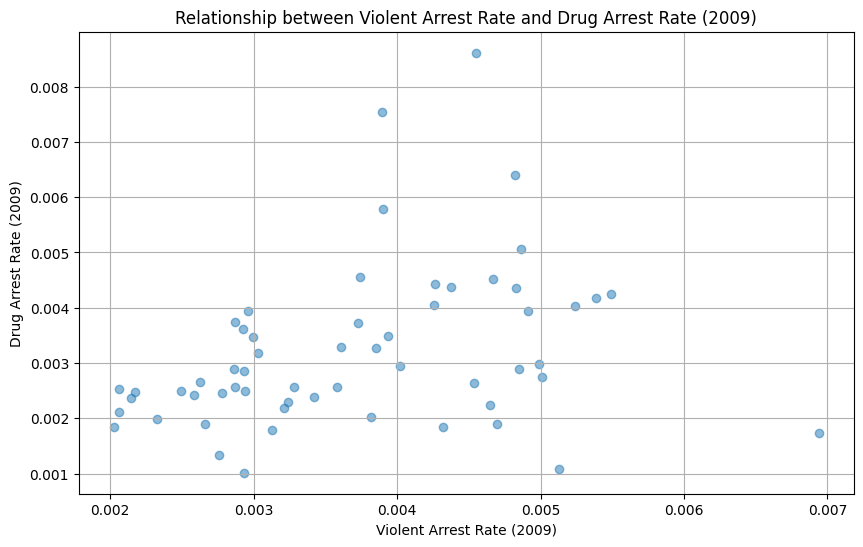

In [82]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    new_merged_df_2009["violent_arrest_rate_2009"],
    new_merged_df_2009["drug_arrest_rate_2009"],
    alpha=0.5,
)
plt.title("Relationship between Violent Arrest Rate and Drug Arrest Rate (2009)")
plt.xlabel("Violent Arrest Rate (2009)")
plt.ylabel("Drug Arrest Rate (2009)")
plt.grid(True)
plt.show()

### Exercise 14

Based on this simple comparison of 2009 violent arrest rates and drug arrest rates, what might you conclude about the relationship between the illegal drug trade and violent crime?

<span style="color: #008080">Based on this simple comparison of 2009 violent arrest rates and drug arrest rates, the plot shows positive corelation between illegal drug trade and violent crime. Specificelly, as the violent arrest rate increases, the drug arrest rate also tends to increase. There are clusters of points in the bottom-left region, suggesting that many counties have relatively low arrest rates for both violent crimes and drug offenses.</span> 

## Comparing with 2018 Arrests

The preceding analysis can tell us about whether violent crime and the drug trade are correlated, but it doesn't tell us much about whether they are *causally* related. It *could* be the case that people dealing drugs *cause* more violent crime, but it could also be that certain communities, for some other reason, tend to have *both* more drug sales *and* more violent crime. 

To help answer this question, let's examine whether violent crime arrest rates changed in response to drug legalization. In particular, let's do this by comparing violent crime arrest rates in 2009 (before drug legalization) to violent crime arrest rates in 2018 (after drug legalization). If the illegal drug trade causes violent crime, then we would expect the violent crime rate to fall in response to drug legalization.


### Exercise 15

Just as we created violent arrest rates and drug arrest rates for 2009, now we want to do it for 2018. Using the data on 2018 arrests (also in the [same repository](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca) we used before) and the same dataset of population data (you'll have to use population from 2013-2017, as 2018 population data has yet to be released), create a dataset of arrest rates. 

As before, *be careful with your merges!!!*

In [83]:
data_2018 = pd.read_csv(
    "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/ca_arrests_2018.csv"
)
df_2018 = pd.read_csv(data_2)

df_2018 = df_2018[(df_2018["STATE"] == "California") & (df_2018["YEAR"] == "2013-2017")]

# correct names
df_2018.loc[df_2018.COUNTY == "DelNorte County", "COUNTY"] = "Del Norte County"
df_2018.loc[df_2018.COUNTY == "Injo County", "COUNTY"] = "Inyo County"

# merge as a new
new_merged_df_2018 = pd.merge(
    df_2018, data_2018, how="outer", on="COUNTY", indicator=True
)
new_merged_df_2018._merge.value_counts()
print(f"There are 58 observations successfully merged.")

There are 58 observations successfully merged.


### Exercise 16

Now merge our two county-level datasets so you have one row for every county, and variables for violent arrest rates in 2018, violent arrest rates in 2009, felony drug arrest rates in 2018, and felony drug arrest rates in 2009. Store the number of observations in your final data set in your `results` dictionary under the key `"ex16_num_obs"`.

In [84]:
# check for 2009
new_merged_df_2009.tail()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge,violent_arrest_rate_2009,drug_arrest_rate_2009
53,1735,Tulare County,2183,2080,1681,170,1767,7881,15368,301,239,2005-2009,California,416299,both,0.005244,0.004038
54,1736,Tuolumne County,160,252,209,14,261,896,2062,83,240,2005-2009,California,55761,both,0.002869,0.003748
55,1737,Ventura County,2275,2425,2040,120,2083,8943,25762,1734,241,2005-2009,California,792313,both,0.002871,0.002575
56,1738,Yolo County,585,634,614,39,662,2534,5426,73,242,2005-2009,California,192974,both,0.003031,0.003182
57,1739,Yuba County,354,368,211,39,257,1229,2967,4,243,2005-2009,California,70906,both,0.004993,0.002976


In [85]:
# arrest rate 2018
new_merged_df_2018["violent_arrest_rate_2018"] = (
    new_merged_df_2018["VIOLENT"] / new_merged_df_2018["total_population"]
)

new_merged_df_2018["drug_arrest_rate_2018"] = (
    new_merged_df_2018["F_DRUGOFF"] / new_merged_df_2018["total_population"]
)

# include drug_arrest_rate_2018 and violent_arrest_rate_2018
new_merged_df_2018.head()

,Unnamed: 0_x,YEAR,STATE,COUNTY,total_population,Unnamed: 0_y,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,_merge,violent_arrest_rate_2018,drug_arrest_rate_2018
0,186,2013-2017,California,Alameda County,1629615,2204,4132,3051,1062,173,2619,11037,28305,82,both,0.002536,0.000652
1,187,2013-2017,California,Alpine County,1203,2205,5,2,1,0,3,11,41,0,both,0.004156,0.000831
2,188,2013-2017,California,Amador County,37306,2206,72,40,31,3,142,288,701,1,both,0.001930,0.000831
3,189,2013-2017,California,Butte County,225207,2207,785,437,229,47,741,2239,8853,1,both,0.003486,0.001017
4,190,2013-2017,California,Calaveras County,45057,2208,147,42,29,6,96,320,897,0,both,0.003263,0.000644


In [86]:
# create a new df for 2009 and 2018
df_2009_2018 = pd.merge(
    new_merged_df_2009[["COUNTY", "violent_arrest_rate_2009", "drug_arrest_rate_2009"]],
    new_merged_df_2018[["COUNTY", "violent_arrest_rate_2018", "drug_arrest_rate_2018"]],
    on="COUNTY",
    how="outer",
    validate="1:1",
    indicator="merge",
)

df_2009_2018["merge"].value_counts()

# ex16_num_obs = "58"
results["ex16_num_obs"] = 58
# print(f"There are {(ex16_num_obs):} observation successfully merged.")

In [87]:
# check for 2009 & 2018
df_2009_2018.head()

,COUNTY,violent_arrest_rate_2009,drug_arrest_rate_2009,violent_arrest_rate_2018,drug_arrest_rate_2018,merge
0,Alameda County,0.002963,0.003946,0.002536,0.000652,both
1,Alpine County,0.006938,0.001735,0.004156,0.000831,both
2,Amador County,0.002629,0.002655,0.001930,0.000831,both
3,Butte County,0.002941,0.002487,0.003486,0.001017,both
4,Calaveras County,0.004533,0.002642,0.003263,0.000644,both


### Exercise 17

Did drug arrests go down from 2009 to 2018 in response to drug legalization? (they sure better! This is what's called a "sanity check" of your data and analysis. If you find drug arrests went *up*, you know something went wrong with your code or your understanding of the situations). 

Store the average county-level change in drug arrests per capita in `results` under the key `"ex17_drug_change"`.

In [88]:
drug_change = (
    df_2009_2018["drug_arrest_rate_2018"] - df_2009_2018["drug_arrest_rate_2009"]
).mean()


# ex17_drug_change = "-0.0022133472788366236"
results["ex17_drug_change"] = drug_change

# print(
# f"There are about 0.22 unit of drug arrests rate decrease after the drug legalization.")

### Exercise 18

Now we want to look at whether violent crime decreased following drug legalization. Did the average violent arrest rate decrease? By how much? (Note: We're assuming that arrest rates are proportionate to crime rates. If policing increased so that there were more arrests per crime committed, that would impact our interpretation of these results. But this is just an exercise, so...)

Store the average county-level change in violent arrests per capita in `results` under the key `"ex18_violent_change"`

In [89]:
violent_change = (
    df_2009_2018["violent_arrest_rate_2018"] - df_2009_2018["violent_arrest_rate_2009"]
).mean()


# ex18_violent_change = "-0.00028268480439183743"
results["ex18_violent_change"] = violent_change

### Exercise 19

Based on your answers to exercises 17 and 18, what might you conclude about the relationship between the illegal drug trade and violent crime? Did legalizing drugs increase violent crime (assuming arrest rates are a good proxy for crime rates)? Decrease violent crime? Have no effect? 

<span style="color: #008080">It's evident that following the legalization of drugs, there was a decline in both the violent and drug arrest rates. However, it's crucial to note that this decrease was marginal, suggesting that while there is a downward trend, the impact of drug legalization on these arrest rates has been relatively minor so far.  </span> 

## Difference in Difference Analysis

The preceding analysis is something we sometimes call a "pre-post" analysis, in that it is a comparison of how and outcome we care about (violent arrest rates) changes from before a treatment is introduced ("pre") to after ("post"). BUT: pre-post comparisons are imperfect. If we knew that violent crime was not going to change at all in a world without drug legalization, then this comparison is perfectly valid. But what if, absent drug legalization, violent crime would have fallen on its own (maybe because of advances in policing practices or a better economy)? Or maybe it would have increased?

This is actually a very common problem. For example, imagine you're trying to figure out whether taking tylenol helps with headaches. You have a patient with a headache, you give them tylenol, and then the next day you ask them if they still have a headache, and find out that they don't — does that mean that tylenol cured the headache? Maybe... but most headaches eventually resolve on their own, so maybe the headache would have passed with or without the patient taking tylenol! In fact, there's a term for this phenomenon in medicine — the "natural history" of a disease, which is the trajectory that we think a disease might follow absent treatment. And the natural history of the disease is almost never for it to stay exactly the same indefinitely.

(All of this is closely related to the discipline of causal inference, and if it makes your head to hurt, don't worry — that means you're doing it right! We will talk lots and lots more about it in the weeks and months to come.)

One way to try to overcome this problem is with something called a difference-in-difference analysis. Rather than just looking at whether violent drug arrest rates increase or decrease between 2009 and 2018, we can split our sample of counties into those that were *more* impacted by drug legalization and those that were *less* impacted by drug legalization and evaluate whether we see a greater change in the violent drug arrest rate in the counties that were more impacted. 

What does it mean to have been "more impacted" by drug legalization? In this case, we can treat the counties that had higher drug arrest rates in 2009 as counties that were more impacted by drug legalization than those that had low drug arrest rates in 2009. After all, in a county that had no drug arrests, legalization wouldn't do anything, would it? 



### Exercise 20

First, split our sample into two groups: high drug arrests in 2009, and low drug arrests in 2009 (cut the sample at the average drug arrest rate in 2009). 


In [90]:
# high drug 2009
high_drug_2009 = df_2009_2018[
    df_2009_2018["drug_arrest_rate_2009"] > df_2009_2018["drug_arrest_rate_2009"].mean()
]

# low drug 2009
low_drug_2009 = df_2009_2018[
    df_2009_2018["drug_arrest_rate_2009"] < df_2009_2018["drug_arrest_rate_2009"].mean()
]

high_drug_2009
low_drug_2009

,COUNTY,violent_arrest_rate_2009,drug_arrest_rate_2009,violent_arrest_rate_2018,drug_arrest_rate_2018,merge
1,Alpine County,0.006938,0.001735,0.004156,0.000831,both
2,Amador County,0.002629,0.002655,0.001930,0.000831,both
3,Butte County,0.002941,0.002487,0.003486,0.001017,both
4,Calaveras County,0.004533,0.002642,0.003263,0.000644,both
5,Colusa County,0.002762,0.001333,0.003073,0.000233,both
6,Contra Costa County,0.002930,0.002851,0.002326,0.000708,both
7,Del Norte County,0.005012,0.002750,0.005503,0.001567,both
8,El Dorado County,0.003240,0.002291,0.002594,0.000551,both
13,Inyo County,0.004645,0.002236,0.005881,0.000714,both
15,Kings County,0.002659,0.001895,0.004015,0.000573,both



### Exercise 21

Now, determine weather violent crime changed *more* from 2009 to 2018 in the counties that had lots of drug arrests in 2009 (where legalization likely had more of an effect) than in counties with fewer drug arrests in 2009 (where legalization likely mattered less)? 

Calculate this difference-in-difference:

```
(the change in violent crime rate per capita for counties with lots of drug arrests in 2009) 
- (the change in violent crime rate per capita for counties with few drug arrests in 2009)

```

Store your "difference-in-difference" estimate in your `results` dictionary under the key `"ex21_diffindiff"`.

In [91]:
# Calculate this difference-in-difference:

# ```
# (the change in violent crime rate per capita for counties with lots of drug arrests in 2009)
# - (the change in violent crime rate per capita for counties with few drug arrests in 2009)

# crime change to high & crime change to low

h = (
    high_drug_2009["violent_arrest_rate_2018"]
    - high_drug_2009["violent_arrest_rate_2009"]
)
change_high = h.mean()

l = (
    low_drug_2009["violent_arrest_rate_2018"]
    - low_drug_2009["violent_arrest_rate_2009"]
)
change_low = l.mean()


diff_in_diff = change_high - change_low


print(diff_in_diff)

results["ex21_diffindiff"] = diff_in_diff

-0.000247393788613558


### Exercise 22

Interpret your difference in difference result.

<span style="color: #008080">The violent crime rate decreased slightly (by approximately 0.024 unit) from 2009 to 2018 in counties with fewer drug arrests in 2009 compared to counties that had lots of drug arrests in 2009. This suggests that the effect of drug legalization on the reduction of violent crime was slightly a bit more noticeable in counties where drug-related arrests were initially lower. However, the magnitude of this difference is minimal, indicating that the effect is subtle.</span> 

### Exercise 23

The quantity we estimated above is a little difficult to interpret. Rather than calculating the *absolute* change in violent arrest rates per capita, let's calculate the *proportionate* change.

Calculate:

```
(the county-level percentage change in violent crime rate with lots of drug arrests in 2009) 
- (the county-level percentage change in violent crime rate with few drug arrests in 2009)
```
Store your "difference-in-difference" estimate in your `results` dictionary under the key `"ex23_diffindiff_proportionate"`. Report your result in percentages, such that a value of `-100` would imply that the average county experienced a 100% decrease in the violent arrest rate.

In [92]:
percentage_change_high = (h / high_drug_2009["violent_arrest_rate_2009"]).mean() * 100

percentage_change_low = (l / low_drug_2009["violent_arrest_rate_2009"]).mean() * 100
# price = (current_price - last_close) / last_close * 100

diffindiff_proportionate = percentage_change_high - percentage_change_low
ex23_diffindiff_proportionate = diffindiff_proportionate
results["ex23_diffindiff_proportionate"] = ex23_diffindiff_proportionate
print(
    f"The absolute difference between the high and low drug violent arrest rates is {round(ex23_diffindiff_proportionate):,}%.\n"
)

The absolute difference between the high and low drug violent arrest rates is -5%.



## Check Results

In [93]:
results

{'ex6_validate_keyword': 'one-to-one',
 'ex10_merged_successfully': 56,
 'ex16_num_obs': 58,
 'ex17_drug_change': -0.0022133472788366236,
 'ex18_violent_change': -0.00028268480439183743,
 'ex21_diffindiff': -0.000247393788613558,
 'ex23_diffindiff_proportionate': -4.913794186222825}

In [94]:
assert set(results.keys()) == {
    "ex6_validate_keyword",
    "ex10_merged_successfully",
    "ex16_num_obs",
    "ex17_drug_change",
    "ex18_violent_change",
    "ex21_diffindiff",
    "ex23_diffindiff_proportionate",
}